Titanic Data from Kaggle.  
===

Slurp it in and clean it up with pandas.
Then use scikit-learn to play with it.

##Basic Setup

In [1]:
import pandas as pd
import numpy as np
import pylab as P
%matplotlib inline

C:\Users\Joey\Anaconda\lib\site-packages\numpy\core\__init__.py:14: Warning: Numpy built with MINGW-W64 on Windows 64 bits is experimental, and only available for 
testing. You are advised not to use it for production. 

CRASHES ARE TO BE EXPECTED - PLEASE REPORT THEM TO NUMPY DEVELOPERS
  from . import multiarray


In [2]:
#from collections import defaultdict 

##Import Training data

In [2]:
# always use header= 0 if you KNOW the header is in row 0
df = pd.read_csv('train.csv', header=0)

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


##Extract Titles
Title may indicate a reason to survive or not (e.g., reverends should sacrifice...).  It also indicates age, so we will use that to replace missing ages with means by title.

In [4]:
titles = {'Miss':2.,'Master':1.,'Mr.':3., 'Mrs.':4.,'Ms.':4.,'Rev.':5.,'Dr.':6.,'Mlle.':2.,
          'Mme':4.}
def entitle(s):
    for title in titles:
        if title in s:
            return titles[title]
    else:
        return 0

In [5]:
df['Title']=df.Name.map(entitle)

## Convert important non-numeric data to numbers

In [6]:
df['Gender']=df.Sex.map( {'female': 1, 'male': 0} ).astype(float)

In [7]:
port_dict ={'S':0,'C':1,'Q':2}
df['Port']=df.Embarked.map(port_dict)


## Remove less-useful nonnumeric columns, 

now that there are numeric equivalents of the ones that are likely to be important

First identify them:

In [8]:
df.dtypes[df.dtypes.map(lambda x: x=='object')]


Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

Now remove them

In [9]:
df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1) 

In [10]:
df[:5]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Gender,Port
0,1,0,3,22,1,0,7.2500,3,0,0
1,2,1,1,38,1,0,71.2833,4,1,1
2,3,1,3,26,0,0,7.9250,2,1,0
3,4,1,1,35,1,0,53.1000,4,1,0
4,5,0,3,35,0,0,8.0500,3,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Title          891 non-null float64
Gender         891 non-null float64
Port           889 non-null float64
dtypes: float64(5), int64(5)
memory usage: 76.6 KB


##Fix ages
Note above that many ages are missing.  We will fill them in with mean age by title.

## Compute average ages of each title

In [12]:
mean_age = df.Age.mean()
print mean_age

29.6991176471


In [13]:
df.Age.isnull().sum()

177

In [14]:
mean_ages = df.groupby("Title").mean().unstack()['Age'].values #extract means
title_to_age = {i:age for i,age in enumerate(mean_ages)} #define a map

print mean_ages
print title_to_age

[ 49.1          4.57416667  21.80405405  32.36809045  35.71818182
  43.16666667  42.        ]
{0: 49.100000000000001, 1: 4.5741666666666667, 2: 21.804054054054053, 3: 32.368090452261306, 4: 35.718181818181819, 5: 43.166666666666664, 6: 42.0}


## Replace each missing age 

with title_to_age value (the mean for that title)

In [15]:
df.Age = df.Age.fillna(df.Title.map(title_to_age))



In [16]:
df.groupby('Title').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Port
Title,,,,,,,,,
0,584.700000,0.500000,1.000000,49.100000,0.300000,0.100000,40.085000,0.200000,0.400000
1,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,0.000000,0.325000
2,411.793478,0.701087,2.293478,21.804054,0.706522,0.543478,43.967484,1.000000,0.579235
3,454.499033,0.156673,2.410058,32.368090,0.288201,0.152805,24.441560,0.000000,0.299807
4,452.433071,0.795276,1.992126,35.718182,0.685039,0.818898,45.075721,1.000000,0.301587
5,485.666667,0.000000,2.000000,43.166667,0.166667,0.166667,18.312500,0.000000,0.333333
6,545.857143,0.428571,1.285714,42.000000,0.571429,0.000000,49.168457,0.142857,0.571429


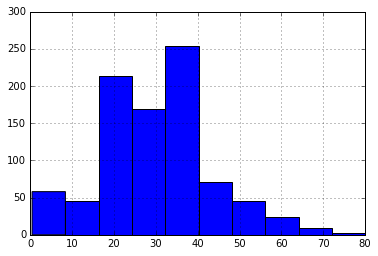

In [17]:
df.Age.dropna().hist(bins=10)

## Convert all to float: 

Scikit-learn only likes floats

In [18]:
df = df.astype(float)

Fix missing fares

In [19]:
df.Fare = df.Fare.fillna(df.Fare.mean())

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null float64
Survived       891 non-null float64
Pclass         891 non-null float64
Age            891 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Fare           891 non-null float64
Title          891 non-null float64
Gender         891 non-null float64
Port           889 non-null float64
dtypes: float64(10)
memory usage: 76.6 KB


## Feature engineering

make some more new columns that might be useful


has family and family size seem likely to matter

In [21]:
df['family_size'] = df['Parch']+df['SibSp']

In [22]:
df['has_family'] = df['family_size'] > 0.5

## again convert all to float
Scikit-learn only likes floats
Also must fix all missing values---can't drop!


In [23]:
df = df.astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null float64
Survived       891 non-null float64
Pclass         891 non-null float64
Age            891 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Fare           891 non-null float64
Title          891 non-null float64
Gender         891 non-null float64
Port           889 non-null float64
family_size    891 non-null float64
has_family     891 non-null float64
dtypes: float64(12)
memory usage: 90.5 KB


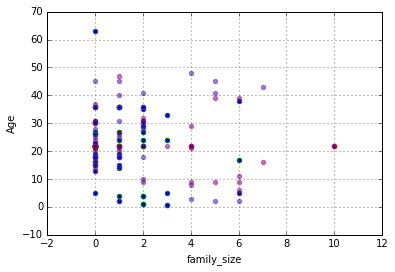

In [24]:
women = df['Gender'] >0.5
lived = df['Survived']>0.5
rabble = df['Pclass'] > 2.5
ax=df[women & lived & rabble].plot(kind='scatter', x='family_size',y='Age',color='Green')
df[women & ~lived & rabble].plot(kind='scatter', x='family_size',y='Age',color='Red',alpha=0.5,ax=ax)
big_fam = df['family_size'] > 2.5


In [25]:
df.Survived[~big_fam & women & rabble].sum()/(1.*df.Survived[~big_fam & women & rabble].size)

0.57657657657657657

## My current tree

if male then dead
elif rabble and big_family then dead

Remains to sort the rabble women with small family 

Also maybe sort the men better

In [26]:
rwsf = df[~big_fam & women & rabble]
men = df[~women]


In [27]:
rwsf.sum()

PassengerId    42228.000000
Survived          64.000000
Pclass           333.000000
Age             2603.369042
SibSp             36.000000
Parch             37.000000
Fare            1279.987800
Title            286.000000
Gender           111.000000
Port              83.000000
family_size       73.000000
has_family        51.000000
dtype: float64

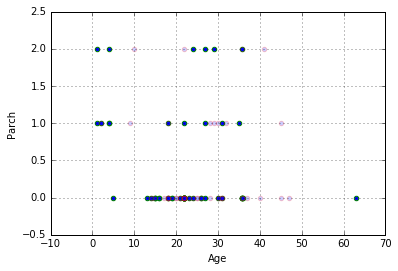

In [28]:
lived = rwsf['Survived']>0.5
ax=rwsf[lived].plot(kind='scatter', x='Age',y='Parch',color='Green')
rwsf[~lived].plot(kind='scatter', x='Age',y='Parch',color='Red',alpha=0.2,ax=ax)



In [29]:
rwsf.groupby('Parch')[['Survived','Gender']].sum()

,Survived,Gender
Parch,,
0,49,84
1,9,17
2,6,10


In [30]:
df = df.drop(['PassengerId'],axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived       891 non-null float64
Pclass         891 non-null float64
Age            891 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Fare           891 non-null float64
Title          891 non-null float64
Gender         891 non-null float64
Port           889 non-null float64
family_size    891 non-null float64
has_family     891 non-null float64
dtypes: float64(11)
memory usage: 83.5 KB


In [32]:
df.groupby('Title').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Port,family_size,has_family
Title,,,,,,,,,,
0,0.500000,1.000000,49.100000,0.300000,0.100000,40.085000,0.200000,0.400000,0.400000,0.300000
1,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,0.000000,0.325000,3.675000,1.000000
2,0.701087,2.293478,21.804054,0.706522,0.543478,43.967484,1.000000,0.579235,1.250000,0.445652
3,0.156673,2.410058,32.368090,0.288201,0.152805,24.441560,0.000000,0.299807,0.441006,0.232108
4,0.795276,1.992126,35.718182,0.685039,0.818898,45.075721,1.000000,0.301587,1.503937,0.826772
5,0.000000,2.000000,43.166667,0.166667,0.166667,18.312500,0.000000,0.333333,0.333333,0.333333
6,0.428571,1.285714,42.000000,0.571429,0.000000,49.168457,0.142857,0.571429,0.571429,0.285714


In [33]:
df.columns.values[1:]

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'Gender',
       'Port', 'family_size', 'has_family'], dtype=object)

In [34]:
for x in sorted([[v,k] for k,v in titles.items()]):
    print x, '\n'


[1.0, 'Master'] 

[2.0, 'Miss'] 

[2.0, 'Mlle.'] 

[3.0, 'Mr.'] 

[4.0, 'Mme'] 

[4.0, 'Mrs.'] 

[4.0, 'Ms.'] 

[5.0, 'Rev.'] 

[6.0, 'Dr.'] 



##Final prep for scikit-learn

Remove NaNs -- else SciKitLearn will complain.

In [35]:
df = df.dropna()

In [36]:

train_data = df.values
train_data

array([[  0.        ,   3.        ,  22.        , ...,   0.        ,
          1.        ,   1.        ],
       [  1.        ,   1.        ,  38.        , ...,   1.        ,
          1.        ,   1.        ],
       [  1.        ,   3.        ,  26.        , ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [  0.        ,   3.        ,  21.80405405, ...,   0.        ,
          3.        ,   1.        ],
       [  1.        ,   1.        ,  26.        , ...,   1.        ,
          0.        ,   0.        ],
       [  0.        ,   3.        ,  32.        , ...,   2.        ,
          0.        ,   0.        ]])

In [37]:
Y = train_data[:,0] #first column is label
X = train_data[:,1:] #rest is features

In [38]:
X.shape

(889L, 10L)

In [39]:
Y.shape

(889L,)

#Scikit-learn

Fit a tree

In [43]:
from sklearn import tree
from sklearn.externals.six import StringIO
from sklearn.ensemble import RandomForestClassifier
import pydot #to plot trees


In [44]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [45]:
rf = RandomForestClassifier(n_estimators = 100)
rf = rf.fit(X,Y)



In [46]:
%timeit clf.fit(X,Y)


100 loops, best of 3: 2.46 ms per loop


In [47]:
%timeit rf.fit(X,Y)

1 loops, best of 3: 307 ms per loop


In [48]:
86/1.57

54.77707006369427

So a RF with 100 trees only takes 55 times as long as a single tree.

Compare to AdaBoost

In [49]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

AdB = AdaBoostClassifier(n_estimators=100)


In [50]:
%timeit AdB.fit(X,Y)

1 loops, best of 3: 299 ms per loop


So about the same time to fit AdaBoost as RF

Now compare CV scores

In [51]:
AdB_scores = cross_val_score(AdB, X, Y)
AdB_scores.mean()

0.80880122546789213

In [52]:
RF_scores = cross_val_score(rf, X, Y)
RF_scores.mean()

0.80091834258500916

So about the same CV score.

Limit the number of classifiers considered at each step of RF:

In [53]:
rf = RandomForestClassifier(n_estimators = 100, max_features=1)

In [54]:
%timeit rf.fit(X,Y)

1 loops, best of 3: 290 ms per loop


In [55]:
RF_scores = cross_val_score(rf, X, Y)
RF_scores.mean()

0.79305062638395973

What about a plain tree?

In [56]:
tree_scores = cross_val_score(clf, X, Y)
tree_scores.mean()

0.76378272211605547

Play around with different parameters for the RF

In [57]:
rf = RandomForestClassifier(n_estimators = 10, max_features=1,oob_score=True)

In [58]:
##find the best number of features to allow
best = .8
for i in range(1,11):
    rf.set_params(max_features=i)
    for n in range(40,201,10):
        rf.set_params(n_estimators=n)
        rf.fit(X,Y)
        if rf.oob_score_ > best:
            best = rf.oob_score_
            print 'number of trees = {}.  Max_features = {}.  OoB Score = {}'.format(n, i, rf.oob_score_)
print '\n Done \n'

number of trees = 50.  Max_features = 1.  OoB Score = 0.804274465692
number of trees = 60.  Max_features = 1.  OoB Score = 0.808773903262
number of trees = 180.  Max_features = 1.  OoB Score = 0.81214848144
number of trees = 40.  Max_features = 3.  OoB Score = 0.815523059618
number of trees = 100.  Max_features = 3.  OoB Score = 0.81664791901
number of trees = 170.  Max_features = 3.  OoB Score = 0.818897637795
number of trees = 100.  Max_features = 4.  OoB Score = 0.824521934758
number of trees = 140.  Max_features = 6.  OoB Score = 0.826771653543

 Done 



In [59]:
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf=10,
                             max_leaf_nodes=8, oob_score=True)

In [60]:
clf.fit(X,Y)
clf.oob_score_

0.82339707536557927

In [61]:
##find the best number of features to allow
best = .8
for i in range(1,11):
    clf.set_params(max_features=i)
    for n in range(40,201,10):
        clf.set_params(n_estimators=n)
        clf.fit(X,Y)
        if clf.oob_score_ > best:
            best = clf.oob_score_
            print 'number of trees = {}.  Max_features = {}.  OoB Score = {}'.format(n, i, clf.oob_score_)
print '\n Done \n'

number of trees = 50.  Max_features = 1.  OoB Score = 0.81214848144
number of trees = 90.  Max_features = 1.  OoB Score = 0.814398200225
number of trees = 100.  Max_features = 1.  OoB Score = 0.815523059618
number of trees = 110.  Max_features = 1.  OoB Score = 0.824521934758
number of trees = 130.  Max_features = 1.  OoB Score = 0.826771653543
number of trees = 100.  Max_features = 2.  OoB Score = 0.827896512936
number of trees = 140.  Max_features = 2.  OoB Score = 0.831271091114
number of trees = 110.  Max_features = 7.  OoB Score = 0.832395950506

 Done 



This previous turns out to be overfit--since it did not score quite as well as the version I submitted last month with 100 trees and no constraints on the max_features.

In [62]:
from sklearn.ensemble import ExtraTreesClassifier

In [209]:
ef = ExtraTreesClassifier(n_estimators = 100, min_samples_leaf=5,
                             max_leaf_nodes=20, bootstrap=True,oob_score=True)

In [210]:
ef.fit(X,Y)

ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=20,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [212]:
##find the best number of features to allow
best = .8
for i in range(1,11):
    ef.set_params(max_features=i)
    for n in range(40,201,10):
        ef.set_params(n_estimators=n)
        ef.fit(X,Y)
        if ef.oob_score_ > best:
            best = ef.oob_score_
            print 'number of trees = {}.  Max_features = {}.  OoB Score = {}'.format(n, i, ef.oob_score_)
print '\n Done \n'

number of trees = 50.  Max_features = 1.  OoB Score = 0.81214848144
number of trees = 120.  Max_features = 1.  OoB Score = 0.813273340832
number of trees = 60.  Max_features = 2.  OoB Score = 0.814398200225
number of trees = 80.  Max_features = 2.  OoB Score = 0.815523059618
number of trees = 90.  Max_features = 2.  OoB Score = 0.822272215973
number of trees = 140.  Max_features = 2.  OoB Score = 0.825646794151
number of trees = 80.  Max_features = 3.  OoB Score = 0.826771653543
number of trees = 110.  Max_features = 3.  OoB Score = 0.829021372328
number of trees = 170.  Max_features = 3.  OoB Score = 0.830146231721
number of trees = 190.  Max_features = 3.  OoB Score = 0.833520809899

 Done 



###Print the tree for each depth

In [101]:
for d in range(1,6):
    clf = tree.DecisionTreeClassifier(max_depth=d)
    clf = clf.fit(X,Y)
    dot_data = StringIO()
    tree.export_graphviz(clf,feature_names=df.columns.values[1:],out_file=dot_data)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph.write_ps2("titanic-tree-depth{}.ps".format(d))

###Print the tree for each number of leaves

In [99]:
for d in range(2,10):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes=d)
    clf = clf.fit(X,Y)
    dot_data = StringIO()
    tree.export_graphviz(clf,feature_names=df.columns.values[1:],out_file=dot_data)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph.write_ps2("titanic-tree-leaves{}.ps".format(d))

###Print tree for certain minimum samples per leaf

In [104]:
for d in range(20,51,10):
    clf = tree.DecisionTreeClassifier(min_samples_leaf=d)
    clf = clf.fit(X,Y)
    dot_data = StringIO()
    tree.export_graphviz(clf,feature_names=df.columns.values[1:],out_file=dot_data)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    graph.write_ps2("titanic-tree-mspl{}.ps".format(d))

###check my predition

In [53]:
pred_df = pd.read_csv('./titanic_data/tree-prediction-depth4.csv', header=0)

In [54]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 415
Data columns (total 2 columns):
PassengerId    416 non-null int64
Survived       416 non-null int64
dtypes: int64(2)
memory usage: 9.8 KB


In [55]:
pred_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [191]:
418*.79904

333.99872

In [195]:
418*.827

345.686

In [194]:
336/418.

0.8038277511961722

OLD stuff below
===

In [120]:
train_data = df.values
print train_data

[[   1.    0.    3. ...,    3.    1.    0.]
 [   2.    1.    1. ...,    4.    0.    1.]
 [   3.    1.    3. ...,    2.    0.    0.]
 ..., 
 [ 889.    0.    3. ...,    2.    0.    0.]
 [ 890.    1.    1. ...,    3.    1.    1.]
 [ 891.    0.    3. ...,    3.    1.    2.]]


Compute survaival rates by sex

In [36]:
is_female = data[:,4]=='female'
is_male = data[:,4] == 'male'

In [38]:
women_onboard = data[is_female,3]
men_onboard = data[is_male,3]

In [39]:
women_survived = data[is_female,1].astype(np.float)
men_survived = data[is_male,1].astype(np.float)

In [47]:
print 'female survival rate= ', np.sum(women_survived)/np.size(women_onboard)
print 'male survival rate= ', np.sum(men_survived)/np.size(men_onboard)

female survival rate=  0.742038216561
male survival rate=  0.188908145581


Now include also class as a factor

In [51]:
number_of_classes = len(np.unique(data[:,2]))
print number_of_classes
number_of_sexes = len(np.unique(data[:,4]))
print number_of_sexes

3
2


Initialize survival table

In [15]:
df.sort(['Age'])[['Name','Age']]

,Name,Age
803,"Thomas, Master. Assad Alexander",0.42
755,"Hamalainen, Master. Viljo",0.67
644,"Baclini, Miss. Eugenie",0.75
469,"Baclini, Miss. Helene Barbara",0.75
78,"Caldwell, Master. Alden Gates",0.83
831,"Richards, Master. George Sibley",0.83
305,"Allison, Master. Hudson Trevor",0.92
827,"Mallet, Master. Andre",1.00
381,"Nakid, Miss. Maria (""Mary"")",1.00
164,"Panula, Master. Eino Viljami",1.00


array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

NameError: name 'NaN' is not defined

Write a prediction for the test data.

In [41]:
test_file = open('./titanic/test.csv', 'rb')
test_file_object = csv.reader(test_file)
header = test_file_object.next()

In [43]:
prediction_file = open("./titanic/genderbasedmodel.csv", "wb")
prediction_file_object = csv.writer(prediction_file)

In [44]:
prediction_file_object.writerow(["PassengerId", "Survived"])
for row in test_file_object: 
    if row[3] == 'female':   
        prediction_file_object.writerow([row[0],'1'])    
    else:                              
        prediction_file_object.writerow([row[0],'0'])    
test_file.close()
prediction_file.close()

In [21]:
df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Title,Gender,Port
0,892,3,34.5,0,0,7.8292,3,0,2
1,893,3,47.0,1,0,7.0000,4,1,0
2,894,2,62.0,0,0,9.6875,3,0,2
3,895,3,27.0,0,0,8.6625,3,0,0
4,896,3,22.0,1,1,12.2875,4,1,0
5,897,3,14.0,0,0,9.2250,3,0,0
6,898,3,30.0,0,0,7.6292,2,1,2
7,899,2,26.0,1,1,29.0000,3,0,0
8,900,3,18.0,0,0,7.2292,4,1,1
9,901,3,21.0,2,0,24.1500,3,0,0


In [22]:
from pivottablejs import pivot_ui
pivot_ui(df)